In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch 
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision
from torch.utils.tensorboard import SummaryWriter
import torch.nn as nn
import torch.optim as optim
from matplotlib.ticker import MaxNLocator
from PIL import Image
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from random import randint
import numpy as np

In [ ]:
root = '/content/drive/MyDrive/A-Dataset-and-Benchmark-for-Malaria-Life-Cycle-Classification-in-Thin-Blood-Smear-Images-main'
img_root = root + '/IML_Malaria'
label_path = root + "/annotations.json"

In [ ]:
label_file = open(label_path)
data = json.load(label_file)

In [ ]:
data[0]

In [ ]:
pos = randint(0,len(data))
img_info = data[pos]

img = Image.open(img_root + '/' + img_info['image_name'])
img.format = "PNG"

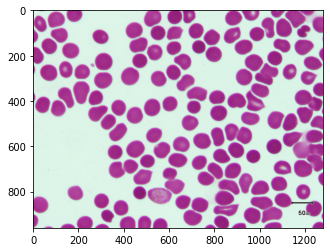

In [ ]:
plt.imshow(img)

In [ ]:
import os
os.path.getsize(img_root + '/' + img_info['image_name'])

216449

In [ ]:
len(img_info['objects'])

123

In [ ]:
len([x for x in img_info['objects'] if x['type'] != 'red blood cell'])

1

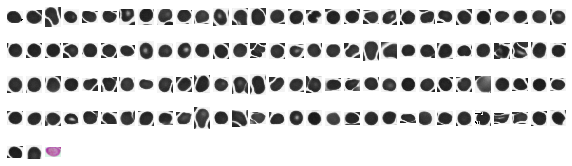

In [ ]:
img_data = np.array(img)

fig = plt.figure(figsize=(10, 3))

rows = 5
columns = 30

for i, obj in enumerate(img_info['objects']): 
    
    b = obj['bbox']
    l = obj['type']

    x = int(b['x'])
    y = int(b['y'])
    w = int(b['w'])
    h = int(b['h'])
    
    is_red = l == 'red blood cell'

    fig.add_subplot(rows, columns, i+1)

    if is_red: 
        plt.imshow(img_data[y:y+h, x:x+w, 1], cmap='gray', vmin = 0, vmax = 255,interpolation='none')
    
    else: 
         plt.imshow(img_data[y:y+h, x:x+w])

    plt.axis('off')

    # rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor=c, facecolor='none')
    # ax.add_patch(rect)

# Add the patch to the Axes

plt.show()

In [ ]:
img.show()

In [ ]:
o = img_info['objects'][10]

b = o['bbox']
l = o['type']

x = int(b['x'])
y = int(b['y'])
w = int(b['w'])
h = int(b['h'])

cropped = Image.fromarray(img_data[y:y+h, x:x+w])

cropped.save("cropped.png")




In [ ]:
!mkdir '/content/drive/MyDrive/MalariaDatasetNEW'
!mkdir '/content/drive/MyDrive/MalariaDatasetNEW/NORMAL'
!mkdir '/content/drive/MyDrive/MalariaDatasetNEW/MALARIA'

In [ ]:
dataset_root = '/content/drive/MyDrive/MalariaDatasetNEW'

In [ ]:
normal_id = 0
malaria_id = 0

for d in data: 
    img = Image.open(img_root + '/' + d['image_name'])
    img.format = "PNG"
    img_data = np.array(img)

    for obj in d['objects']:
        
        b = obj['bbox']
        l = obj['type']

        x = int(b['x'])
        y = int(b['y'])
        w = int(b['w'])
        h = int(b['h'])

        cropped = Image.fromarray(img_data[y:y+h, x:x+w])

        is_red = l == 'red blood cell'

        if is_red:
            cropped.save(dataset_root + '/NORMAL/' + str(normal_id).rjust(5, '0')+ "_NORMAL" + ".png")
            normal_id += 1

        else: 
            cropped.save(dataset_root + '/MALARIA/' + str(malaria_id).rjust(3, '0') + "_MALARIA" + ".png")
            malaria_id += 1

In [ ]:
len(os.listdir(dataset_root + '/NORMAL/')), len(os.listdir(dataset_root + '/MALARIA/'))

(37899, 550)